In [50]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
from scipy import ndimage
import matplotlib

Загружаем картинку

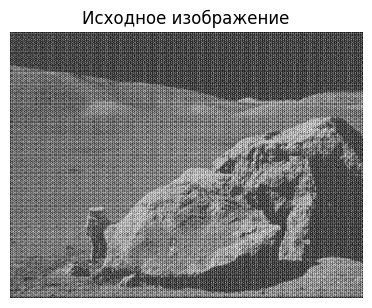

In [51]:
image = cv.imread('assets/periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

1. Реализуем высокочастотную фильтрацию на основе ядра Гаусса

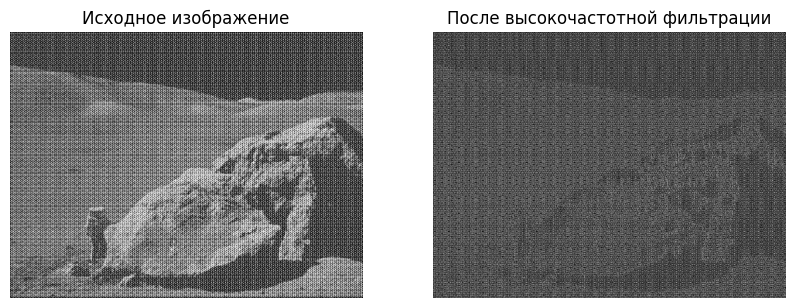

In [67]:
# преобразование Фурье
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# подберём частоту среза
cutoff_frequency = 30

x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)
gaussian_low = np.exp(-((X - ccol)**2 + (Y - crow)**2) / (2 * (cutoff_frequency**2)))
gaussian_high = 1 - gaussian_low

fshift = dft_shift * gaussian_high[:, :, np.newaxis]

# обратное преобразование Фурье
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.title('Исходное изображение'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_back, cmap='gray')
plt.title('После высокочастотной фильтрации'), plt.axis('off')
plt.show()

2. Реализуем удаление периодического шума

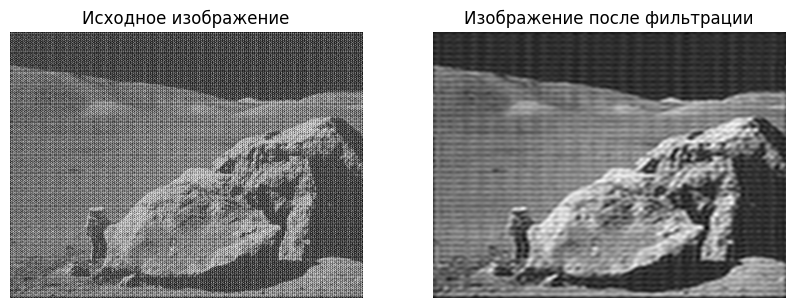

In [68]:
# преобразование Фурье
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
centerX, centerY = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[centerX-50:centerX+50, centerY-50:centerY+50] = 1

fshift = dft_shift * mask

# обратное преобразование Фурье
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.title('Исходное изображение'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_back, cmap='gray')
plt.title('Изображение после фильтрации'), plt.axis('off')
plt.show()